In [120]:
from fastquant import get_stock_data, backtest
from gaussian_hmm import *
import matplotlib.pyplot as plt
import pandas as pd

In [121]:
params = {
    'n_components': 2, 
    'algorithm': 'map', 
    'n_iter': 100, 
    'd': 5,
    'name':'GHMM'
}

ghmm = GHMM(params=params)

In [122]:
# back testing dates on AAPL 2019-01-01 to 2020-05-31
back_test_data = get_stock_data('AAPL', '2019-01-01', '2020-05-31')

[*********************100%***********************]  1 of 1 completed


In [123]:
# training data AAPL 2017-08-01 to 2019-01-01
training_data = get_stock_data('AAPL', '2017-08-01', '2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [124]:
ghmm.train(train_data=training_data)

In [125]:
preds,actual = ghmm.predict(test_data=back_test_data)

DONE355


<IPython.core.display.Javascript object>


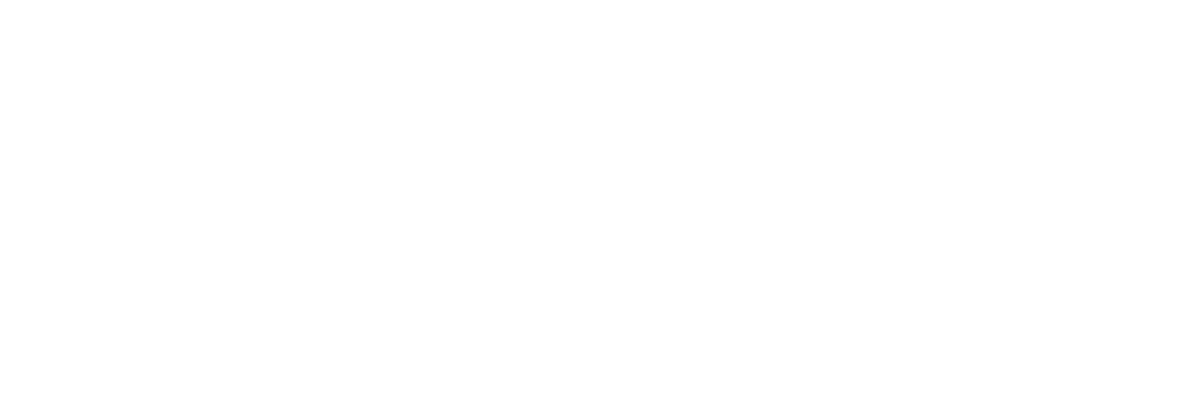

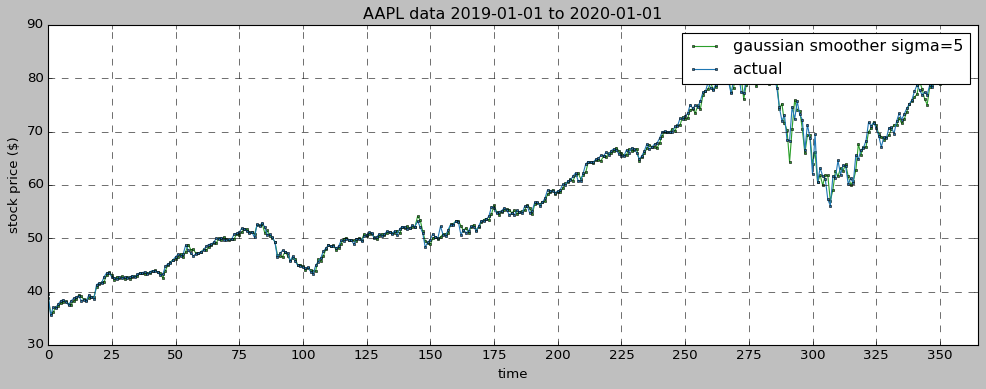

In [126]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('AAPL data 2019-01-01 to 2020-01-01')
time = range(len(preds))
ax.plot(time,preds,color='tab:green',marker='s',markersize=2,linestyle='-',linewidth=1,label='gaussian smoother sigma=5')
ax.plot(time,actual,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
ax.set_xlabel('time')
ax.set_ylabel('stock price ($)')
ax.set_xticks(np.arange(0,len(preds),25))
ax.set_xlim(0,len(preds)+10,)
ax.xaxis.grid(True,ls='--')
ax.yaxis.grid(True,ls='--')
ax.legend()
plt.show()

In [127]:
preds = pd.DataFrame(data=np.array(preds), columns=['yhat'])

In [128]:
expected_1day_return = preds['yhat'].pct_change().shift(-1).multiply(100)

In [129]:
expected_1day_return

0     -7.043711
1      0.382000
2      2.884728
3      0.578820
4      1.156749
         ...   
350    2.447988
351   -2.275136
352    0.199271
353    0.782931
354         NaN
Name: yhat, Length: 355, dtype: float64

In [130]:
back_test_data['custom'] = expected_1day_return.multiply(-1).values

In [131]:
back_test_data

,open,high,low,close,volume,custom
dt,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,148158800,7.043711
2019-01-03,35.994999,36.430000,35.500000,35.547501,365248800,-0.382000
2019-01-04,36.132500,37.137501,35.950001,37.064999,234428400,-2.884728
2019-01-07,37.174999,37.207500,36.474998,36.982498,219111200,-0.578820
2019-01-08,37.389999,37.955002,37.130001,37.687500,164101200,-1.156749
...,...,...,...,...,...,...
2020-05-22,78.942497,79.807503,78.837502,79.722504,81803200,-2.447988
2020-05-26,80.875000,81.059998,79.125000,79.182503,125522000,2.275136
2020-05-27,79.035004,79.677498,78.272499,79.527496,112945200,-0.199271


Starting Portfolio Value: 100000.00
2020-05-28, ===Global level arguments===
2020-05-28, init_cash : 100000
2020-05-28, buy_prop : 1
2020-05-28, sell_prop : 1
2020-05-28, commission : 0.0075
2020-05-28, stop_loss : 0
2020-05-28, stop_trail : 0
===Strategy level arguments===
Upper limit:  3
Lower limit:  -2
2020-05-28, Final Portfolio Value: 229386.34667458537
2020-05-28, Final PnL: 129386.35
Time used (seconds): 0.30582737922668457
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['custom']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	upper_limit:3	lower_limit:-2	custom_column:custom
Returns	rtot:0.8302374993883603	ravg:0.0023453036705885885	rnorm:0.8058231470680621	rnorm100:80.58231470680622
Sharpe	sharperatio

<IPython.core.display.Javascript object>


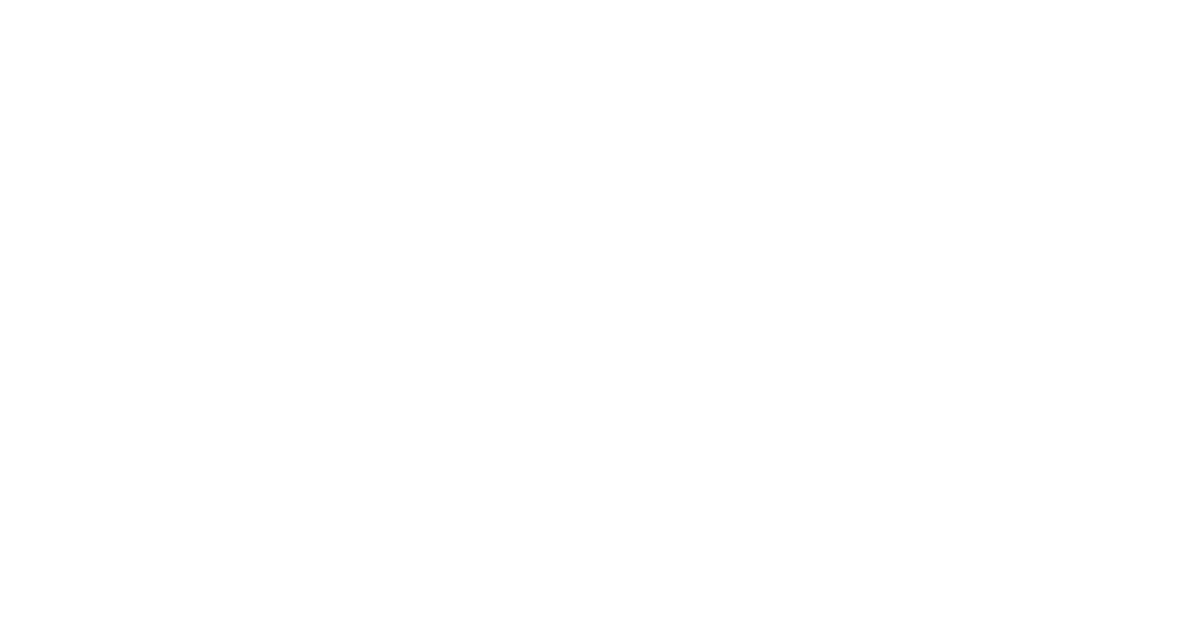

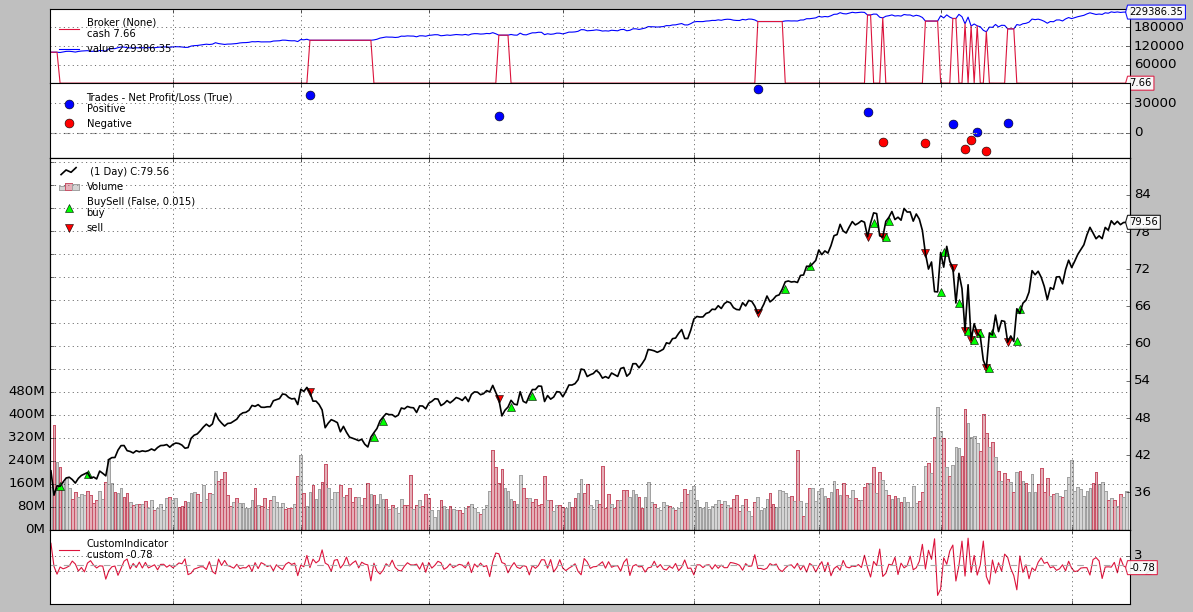

In [138]:
history = backtest("custom", back_test_data.dropna(),upper_limit=3, lower_limit=-2, buy_prop=1, sell_prop=1, return_history=True, execution_type='close', figsize=(15,8))


In [133]:
history

(   strat_id  init_cash  buy_prop  sell_prop  commission  stop_loss  \
 0         0     100000        10         10      0.0075          0   
 
    stop_trail execution_type channel symbol  ...   rnorm100  len  drawdown  \
 0           0          close                 ...  80.582315    5  0.306982   
 
     moneydown                                                max  maxdrawdown  \
 0  706.342918  {'len': 81, 'drawdown': 27.639379868038866, 'm...     27.63938   
 
   maxdrawdownperiod  sharperatio        pnl    final_value  
 0                81     1.154063  129386.35  229386.346675  
 
 [1 rows x 30 columns],
 {'orders':     strat_id                                         strat_name         dt  \
  0          0  buy_prop10_sell_prop10_execution_typeclose_upp... 2019-01-07   
  1          0  buy_prop10_sell_prop10_execution_typeclose_upp... 2019-01-18   
  2          0  buy_prop10_sell_prop10_execution_typeclose_upp... 2019-05-06   
  3          0  buy_prop10_sell_prop10_execution_t